![BTS](https://github.com/vfp1/bts-dsf-2020/blob/main/Logo-BTS.jpg?raw=1)

# Session 9: Text classification and Sentiment analysis

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2020-11-26)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-dsf-2020/blob/main/Session_9/9_Text_classification_and_Sentiment_analysis.ipynb)

**Resources:**


# Spacy installation

```
$ conda activate bts36
$ conda install -c conda-forge spacy
```



## Import language models 



```
$ python -m spacy download en_core_web_sm
$ python -m spacy download en
```



In [ ]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 826.9MB 74.8MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.1.0-cp36-none-any.whl size=828255076 sha256=1ae59ff5604a75e9e585f78f7ec993f0ed77a60dbb836c594157353447d83d25
  Stored in directory: /tmp/pip-ephem-wheel-cache-tbnlm3bw/wheels/b4/d7/70/426d313a459f82ed5e06cc36a50e2bb2f0ec5cb31d8e0bdf09
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
!python -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


Once the model is downloaded and installed, we can load it as follows:

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

# Our first ML Journey (Our first pipeline!!!)



*   Generate dataset
*   Clean dataset
*   Tokenize the dataset
*   Encode/Standardize dataset
*   Build a pipeline that cleans, encodes and trains 
*   Evaluate
*   Use the model!

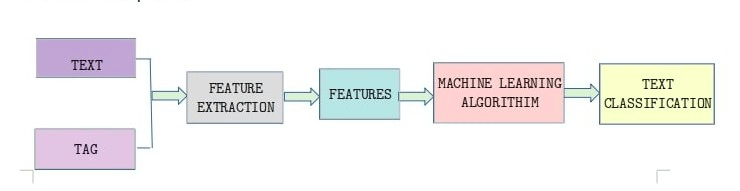


# Text classification (Sentiment analysis pipeline) 

Today we will be using for first time an `scikit learn` pipeline to prepare the data and to classify it. 

We will start with three different datasets where we have a collection of user reactions:

*   IMBD - Review of movies
*   Amazon - Technology products user review
*   Yelp - Restaurant food reviews

The dataset is coded with a `0` when the review is bad and with a `1` when the review is good. 



## ETL: Extract Transform Load

The first process in our pipeline is an ETL one, i.e. Extract, Transform and Load. We will prepare our dataset to be cleaned and to be passed to the processing pipeline.

### Load datasets

In [1]:
!wget "https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/amazon_cells_labelled.txt"

--2020-11-26 06:18:37--  https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/amazon_cells_labelled.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58226 (57K) [text/plain]
Saving to: ‘amazon_cells_labelled.txt’

amazon_cells_labell 100%[===================>]  56.86K  --.-KB/s    in 0.007s  

2020-11-26 06:18:37 (7.79 MB/s) - ‘amazon_cells_labelled.txt’ saved [58226/58226]



In [2]:
!wget "https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/imdb_labelled.txt"

--2020-11-26 06:21:24--  https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/imdb_labelled.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85285 (83K) [text/plain]
Saving to: ‘imdb_labelled.txt’

imdb_labelled.txt   100%[===================>]  83.29K  --.-KB/s    in 0.009s  

2020-11-26 06:21:24 (8.65 MB/s) - ‘imdb_labelled.txt’ saved [85285/85285]



In [3]:
!wget "https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/yelp_labelled.txt"

--2020-11-26 06:21:26--  https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/yelp_labelled.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61320 (60K) [text/plain]
Saving to: ‘yelp_labelled.txt’

yelp_labelled.txt   100%[===================>]  59.88K  --.-KB/s    in 0.007s  

2020-11-26 06:21:27 (7.93 MB/s) - ‘yelp_labelled.txt’ saved [61320/61320]



Once we have ready data that is labelled (please take a minute to look at the source data), we can read it with `Pandas`.

In [4]:
import pandas as pd

# Load our dataset
df_yelp = pd.read_table('yelp_labelled.txt')
df_imdb = pd.read_table('imdb_labelled.txt')
df_amz = pd.read_table('amazon_cells_labelled.txt')

Then we can concatenate all the datasets, so we create a single dataset that contains movie, technology and food reviews

In [5]:
# Concatenate our Datasets
frames = [df_yelp,df_imdb,df_amz]
frames

[                              Wow... Loved this place.  1
 0                                   Crust is not good.  0
 1            Not tasty and the texture was just nasty.  0
 2    Stopped by during the late May bank holiday of...  1
 3    The selection on the menu was great and so wer...  1
 4       Now I am getting angry and I want my damn pho.  0
 ..                                                 ... ..
 994  I think food should have flavor and texture an...  0
 995                           Appetite instantly gone.  0
 996  Overall I was not impressed and would not go b...  0
 997  The whole experience was underwhelming, and I ...  0
 998  Then, as if I hadn't wasted enough of my life ...  0
 
 [999 rows x 2 columns],
     A very, very, very slow-moving, aimless movie about a distressed, drifting young man.    0
 0    Not sure who was more lost - the flat characte...                                       0
 1    Attempting artiness with black & white and cle...                  

In [6]:
# Renaming Column Headers
for colname in frames:
    colname.columns = ["Message","Target"]
frames

[                                               Message  Target
 0                                   Crust is not good.       0
 1            Not tasty and the texture was just nasty.       0
 2    Stopped by during the late May bank holiday of...       1
 3    The selection on the menu was great and so wer...       1
 4       Now I am getting angry and I want my damn pho.       0
 ..                                                 ...     ...
 994  I think food should have flavor and texture an...       0
 995                           Appetite instantly gone.       0
 996  Overall I was not impressed and would not go b...       0
 997  The whole experience was underwhelming, and I ...       0
 998  Then, as if I hadn't wasted enough of my life ...       0
 
 [999 rows x 2 columns],
                                                Message  Target
 0    Not sure who was more lost - the flat characte...       0
 1    Attempting artiness with black & white and cle...       0
 2         Ve

In [7]:
# Assign a Key to Make it Easier
keys = ['Yelp','IMDB','Amazon']

In [8]:
# Merge or Concat our Datasets
df = pd.concat(frames,keys=keys)
df

Message  Target
Yelp   0                                   Crust is not good.       0
       1            Not tasty and the texture was just nasty.       0
       2    Stopped by during the late May bank holiday of...       1
       3    The selection on the menu was great and so wer...       1
       4       Now I am getting angry and I want my damn pho.       0
...                                                       ...     ...
Amazon 994  The screen does get smudged easily because it ...       0
       995  What a piece of junk.. I lose more calls on th...       0
       996                       Item Does Not Match Picture.       0
       997  The only thing that disappoint me is the infra...       0
       998  You can not answer calls with the unit, never ...       0

[2745 rows x 2 columns]

In [9]:
# Length and Shape 
df.shape

(2745, 2)

In [10]:
df.head()

Message  Target
Yelp 0                                 Crust is not good.       0
     1          Not tasty and the texture was just nasty.       0
     2  Stopped by during the late May bank holiday of...       1
     3  The selection on the menu was great and so wer...       1
     4     Now I am getting angry and I want my damn pho.       0

Last, we can save our raw dataset as a CSV file in our system.

In [11]:
df.to_csv("sentimentdataset.csv")

### Cleaning dataset with spaCy

* Removing Stopwords
* Removing punctuation
* Lemmatizing

In [12]:
# Data Cleaning
df.columns

Index(['Message', 'Target'], dtype='object')

In [13]:
# Checking for Missing Values
df.isnull().sum()

Message    0
Target     0
dtype: int64

In [14]:
# Checking for the balance of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2745 entries, ('Yelp', 0) to ('Amazon', 998)
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Message  2745 non-null   object
 1   Target   2745 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 98.8+ KB


In [15]:
# Checking for the balance of our dataset
df.Target.value_counts()

1    1385
0    1360
Name: Target, dtype: int64

#### Tokenizing our dataset with spaCy

We will clean data that we do not need, like stopwords, punctuation and such from our dataset.

This time we will also import the `string` dataset which has a good list of punctuation symbols.

The function we will create will input a sentence, and processing into tokens, doing lemmatization, lowercasing, removing stopwords and avoiding punctuation.

In [16]:
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load('en')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

#### Defining a Transformer

scikit-learn provides a library of transformers which may do the following to feature representations:


*   Clean: [Preprocesing Data](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing)
*   Reduce: [Dimensionality Reduction](https://scikit-learn.org/stable/modules/unsupervised_reduction.html#data-reduction)
*   Expand: [Kernal Approximation](https://scikit-learn.org/stable/modules/kernel_approximation.html#kernel-approximation)
*   Generate: [Feature Extraction](https://scikit-learn.org/stable/modules/feature_extraction.html#feature-extraction)



Like other estimators, these are represented by classes with a fit method, which learns model parameters (e.g. mean and standard deviation for normalization) from a training set, and a transform method which applies this transformation model to unseen data. fit_transform may be more convenient and efficient for modelling and transforming the training data simultaneously.

We will be using the class `TransformerMixin` from `scikit learn` to create our own class transformer.

Our class will override the `transform`, `fit` and `get_params` from the main function and greate our own. We will also pass a function that remove the spaces and converts the text into lowercase for an easier analysis.

In [19]:
from sklearn.base import TransformerMixin 

# This function will clean the text
def clean_text(text):     
    return text.strip().lower()
    
#Custom transformer using Python standard library (you could use spacy as well)
class predictors(TransformerMixin):

    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

## Feature engineering

### Vectorization with Bag of Words and TF-IDF

When we classify text, we end up with text snippets matched with their respective labels. However, we need to represent our text in something that can be represented numerically. Classifying text in positive and negative labels is called **sentiment analysis**.

There are different tools for that, i.e. **Bag of Words** and **TF-IDF**.

#### Bag of Words

The first one converts text into the matrix of occurrence of words within a given document. It focuses on whether given words occurred or not in the document, and it generates a matrix that we might see referred to as a BoW matrix or a document term matrix.

We can generate a BoW matrix for our text data by using scikit-learn‘s CountVectorizer. In the code below, we’re telling CountVectorizer to use the custom spacy_tokenizer function we built as its tokenizer, and defining the ngram range we want.

N-grams are combinations of adjacent words in a given text, where n is the number of words that incuded in the tokens. for example, in the sentence “Who will win the football world cup in 2022?” unigrams would be a sequence of single words such as “who”, “will”, “win” and so on. Bigrams would be a sequence of 2 contiguous words such as “who will”, “will win”, and so on. So the ngram_range parameter we’ll use in the code below sets the lower and upper bounds of the our ngrams (we’ll be using unigrams). Then we’ll assign the ngrams to bow_vector.

*Source: Dataquest*

The ngram_range parameter is the lower and upper boundary of the range of n-values for different word n-grams or char n-grams to be extracted. All values of n such such that min_n <= n <= max_n will be used. For example an ngram_range of (1, 1) means only unigrams, (1, 2) means unigrams and bigrams, and (2, 2) means only bigrams

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

# We create our bag of words (bow) using our tokenizer and defining an ngram range
bow = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1)) 

#### TF-IDF

In short, TF-IDF is a way of normalizing the BOW by looking at each word's frequency in comparisson to the document frequency.

We will skip the sweat from the pass class and use `scikit learn` TF-IDF functionality.

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Using Tfidf
tfvectorizer = TfidfVectorizer(tokenizer = spacy_tokenizer)

## Train-Test split

In machine learning, we always need to split our datasets into train and test. We will use one for training the model and another one to check how the model performs. Luckily, `sklearn` comes with an in-built function for this. 

The split is done randomly, but we can attribute a seed value to make it stable for developing purposes. The usually split is 20% test and 80% train.

In [22]:
# Splitting Data Set
from sklearn.model_selection import train_test_split

In [23]:
# Features and Labels
X = df['Message']
ylabels = df['Target']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3, random_state=42)

In [25]:
X_train.shape

(1921,)

In [26]:
y_train.shape

(1921,)

In [27]:
X_test.shape

(824,)

In [28]:
y_test.shape

(824,)

## The classifier

With choosing a classifier, we are choosing the strategy for our model to learn. Since we are trying to do a classification (good and bad) we will need to choose algorithms that are classifiers. 

We can play with the [classifiers from sklearn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

## EXCURSUS: classification vs regression



*   What will be the value of Apple stock tomorrow?
*   Will Apple stock go up or down tomorrow?
*   What will be the temperature at BCN tomorrow?
*   Will it be colder or hotter at BCN tomorrow?



In [29]:
# SVC classifier
from sklearn.svm import LinearSVC

classifier_SVC = LinearSVC(verbose=True)

In [30]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

classifier_LG = LogisticRegression(verbose=True)

In [31]:
# Multi layer perceptron
from sklearn.neural_network import MLPClassifier

classifier_MLP =  MLPClassifier(max_iter=400, hidden_layer_sizes=(100,2), verbose=True)

## The pipeline

We are going to create an `sklearn` pipeline that:

1. Clean and preprocess the text using our predictors class from above
2. Vectorize the words with either BOW or TF-IDF to create word matrixes from our text.
3. Load the classifier which performs the algorithm we have chosen to classify the sentiments.

![alt text](https://www.dataquest.io/wp-content/uploads/2019/04/text-classification-python-spacy.png)

In [32]:
from sklearn.pipeline import Pipeline

In [33]:
# Create the  pipeline to clean, tokenize, vectorize, and classify 
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow),
                 ('classifier', classifier_MLP)], verbose=True)

In [34]:
# Fit our data
pipe.fit(X_train,y_train)

[Pipeline] ........... (step 1 of 3) Processing cleaner, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing vectorizer, total=   0.4s
Iteration 1, loss = 0.87105392
Iteration 2, loss = 0.84750175
Iteration 3, loss = 0.84001928
Iteration 4, loss = 0.83076823
Iteration 5, loss = 0.82067464
Iteration 6, loss = 0.80912655
Iteration 7, loss = 0.79672433
Iteration 8, loss = 0.78363507
Iteration 9, loss = 0.77094251
Iteration 10, loss = 0.75830476
Iteration 11, loss = 0.74663505
Iteration 12, loss = 0.73545245
Iteration 13, loss = 0.72555398
Iteration 14, loss = 0.71611933
Iteration 15, loss = 0.70783671
Iteration 16, loss = 0.69872519
Iteration 17, loss = 0.66485888
Iteration 18, loss = 0.56328957
Iteration 19, loss = 0.43822642
Iteration 20, loss = 0.32265886
Iteration 21, loss = 0.23815875
Iteration 22, loss = 0.18184288
Iteration 23, loss = 0.14530151
Iteration 24, loss = 0.12048618
Iteration 25, loss = 0.10337082
Iteration 26, loss = 0.09029753
Iteration 27, loss = 0.08034170
Ite

Pipeline(memory=None,
         steps=[('cleaner', <__main__.predictors object at 0x7f47803af0b8>),
                ('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 t...
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100, 2),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                 

## Model evaluation

Now that we have evaluated our model, let's look at how it performs! First of all we need to predict the results of the test using our model:

In [35]:
# Predicting with a test dataset
sample_prediction = pipe.predict(X_test)

Let's check the results for each sample:

In [36]:
# Prediction Results
# 1 = Positive review
# 0 = Negative review
for (sample,pred) in zip(X_test,sample_prediction):
    print(sample,"Prediction=>",pred)

Great pork sandwich. Prediction=> 1
It is a true classic.   Prediction=> 1
It's close to my house, it's low-key, non-fancy, affordable prices, good food. Prediction=> 1
Audio Quality is poor, very poor. Prediction=> 0
We loved the biscuits!!! Prediction=> 1
I don't have very many words to say about this place, but it does everything pretty well. Prediction=> 1
Was not happy. Prediction=> 1
The headsets are easy to use and everyone loves them. Prediction=> 1
I miss it and wish they had one in Philadelphia! Prediction=> 0
Still it's quite interesting and entertaining to follow.   Prediction=> 1
All three broke within two months of use. Prediction=> 0
Oh yeah, and the storyline was pathetic too.   Prediction=> 0
IT'S REALLY EASY. Prediction=> 1
Every element of this story was so over the top, excessively phony and contrived that it was painful to sit through.   Prediction=> 0
The food was outstanding and the prices were very reasonable. Prediction=> 1
I am so tired of clichés that is just

Now we can evaluate the model using different metrics, so that we can look at the three main performance metrics:

* **Accuracy**: refers to the percentage of the total predictions our model makes that are completely correct.
* **Precision**: describes the ratio of true positives to true positives plus false positives in our predictions.
* **Recall**: describes the ratio of true positives to true positives plus false negatives in our predictions.

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/800px-Precisionrecall.svg.png)

In [37]:
from sklearn import metrics

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, sample_prediction))
print("Precision:",metrics.precision_score(y_test, sample_prediction))
print("Recall:",metrics.recall_score(y_test, sample_prediction))

Accuracy: 0.7779126213592233
Precision: 0.8
Recall: 0.7523809523809524


## Let's use our model!

In [38]:
# Another random review
pipe.predict(["I like my life"])

array([0])

In [39]:
example = ["I do enjoy my job",
 "What a poor product!,I will have to get a new one",
 "I feel amazing!",
 "This class sucks"]

pipe.predict(example)

array([1, 0, 1, 0])

# Your turn

Compare results with another approach:

*   Try another vectorizer
*   Try another train/test split
*   Try another algorithm
*   Try changing the parameters of the algorithm (more on that in CDA and ADA)
*   If you feel hardcore: try [another dataset](https://lionbridge.ai/datasets/15-free-sentiment-analysis-datasets-for-machine-learning/)

